In [10]:
import matplotlib.pyplot as plt
# %matplotlib inline
%matplotlib qt5
import mne
import pandas as pd
from mne.channels.montage import get_builtin_montages


In [95]:
data = mne.io.read_raw_edf("edf/chb01_03.edf", preload=True)
info = data.info
channels = data.ch_names
channels
info['meas_date']

Extracting EDF parameters from /Users/johnaguero/assignments/edf/chb01_03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


<ipython-input-95-56c09b66527c>:1: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  data = mne.io.read_raw_edf("edf/chb01_03.edf", preload=True)


(216135784, 0)

In [22]:
ch_dict = {'FP1-F7' : 'AF7',
 'F7-T7' : 'FT7',
 'T7-P7' : 'TP7',
 'P7-O1' : 'PO7',
 'FP1-F3' : 'AF3',
 'F3-C3' : 'FC3',
 'C3-P3' : 'CP3',
 'P3-O1' : 'PO3',
 'FP2-F4' : 'AF4',
 'F4-C4' : 'FC4',
 'C4-P4' : 'CP4',
 'P4-O2' : 'PO4',
 'FP2-F8' : 'AF8',
 'F8-T8' : 'FT8',
 'T8-P8-0' : 'TP8',
 'P8-O2' : 'PO8',
 'FZ-CZ' : 'FCz',
 'CZ-PZ' : 'CPz',
 'P7-T7' : 'T7',
 'T7-FT9' : 'FT9',
 'FT9-FT10' : 'FT10',
 'FT10-T8' : 'T8',
 'T8-P8-1' : 'P8'}
ch_dict

{'FP1-F7': 'AF7',
 'F7-T7': 'FT7',
 'T7-P7': 'TP7',
 'P7-O1': 'PO7',
 'FP1-F3': 'AF3',
 'F3-C3': 'FC3',
 'C3-P3': 'CP3',
 'P3-O1': 'PO3',
 'FP2-F4': 'AF4',
 'F4-C4': 'FC4',
 'C4-P4': 'CP4',
 'P4-O2': 'PO4',
 'FP2-F8': 'AF8',
 'F8-T8': 'FT8',
 'T8-P8-0': 'TP8',
 'P8-O2': 'PO8',
 'FZ-CZ': 'FCz',
 'CZ-PZ': 'CPz',
 'P7-T7': 'T7',
 'T7-FT9': 'FT9',
 'FT9-FT10': 'FT10',
 'FT10-T8': 'T8',
 'T8-P8-1': 'P8'}

In [30]:
data.get_data().shape

(23, 921600)

In [96]:
info['ch_names'] = ['AF7', 'FT7', 'TP7', 'PO7', 'AF3', 'FC3', 'CP3', 'PO3', 'AF4', 'FC4', 'CP4', 'PO4', 'AF8', 'FT8', 'TP8', 'PO8', 'FCz', 'CPz', 'T7', 'FT9', 'FT10', 'T8', 'TP8']
print(info['ch_names'])

['AF7', 'FT7', 'TP7', 'PO7', 'AF3', 'FC3', 'CP3', 'PO3', 'AF4', 'FC4', 'CP4', 'PO4', 'AF8', 'FT8', 'TP8', 'PO8', 'FCz', 'CPz', 'T7', 'FT9', 'FT10', 'T8', 'TP8']


In [ ]:
['AF7', 'FT7', 'TP7', 'PO7', 'AF3', 'FC3', 'CP3', 'PO3', 'AF4', 'FC4', 'CP4', 'PO4', 'AF8', 'FT8', 'TP8', 'PO8', 'FCz', 'CPz', 'T7', 'FT9', 'FT10', 'T8', 'TP8']

In [15]:
info, print(info.keys()), print(info['ch_names']), print(info['chs'][0].keys())

dict_keys(['acq_pars', 'acq_stim', 'ctf_head_t', 'description', 'dev_ctf_t', 'dig', 'experimenter', 'utc_offset', 'device_info', 'file_id', 'highpass', 'hpi_subsystem', 'kit_system_id', 'helium_info', 'line_freq', 'lowpass', 'meas_date', 'meas_id', 'proj_id', 'proj_name', 'subject_info', 'xplotter_layout', 'gantry_angle', 'bads', 'chs', 'comps', 'events', 'hpi_meas', 'hpi_results', 'projs', 'proc_history', 'custom_ref_applied', 'sfreq', 'dev_head_t', 'ch_names', 'nchan'])
['AF7', 'FT7', 'TP7', 'PO7', 'AF3', 'FC3', 'CP3', 'PO3', 'AF4', 'FC4', 'CP4', 'PO4', 'AF8', 'FT8', 'TP8-0', 'PO8', 'FCz', 'CPz', 'T7', 'FT9', 'FT10', 'T8', 'TP8-1']
dict_keys(['cal', 'logno', 'scanno', 'range', 'unit_mul', 'ch_name', 'unit', 'coord_frame', 'coil_type', 'kind', 'loc'])


(<Info | 17 non-empty fields
     bads : list | 0 items
     ch_names : list | AF7, FT7, TP7, PO7, AF3, FC3, CP3, PO3, AF4, ...
     chs : list | 23 items (EEG: 23)
     comps : list | 0 items
     custom_ref_applied : bool | False
     dev_head_t : Transform | 3 items
     dig : Digitization | 24 items (3 Cardinal, 21 EEG)
     events : list | 0 items
     highpass : float | 0.0 Hz
     hpi_meas : list | 0 items
     hpi_results : list | 0 items
     lowpass : float | 128.0 Hz
     meas_date : tuple | 1976-11-06 13:43:04 GMT
     nchan : int | 23
     proc_history : list | 0 items
     projs : list | 0 items
     sfreq : float | 256.0 Hz
     acq_pars : NoneType
     acq_stim : NoneType
     ctf_head_t : NoneType
     description : NoneType
     dev_ctf_t : NoneType
     device_info : NoneType
     experimenter : NoneType
     file_id : NoneType
     gantry_angle : NoneType
     helium_info : NoneType
     hpi_subsystem : NoneType
     kit_system_id : NoneType
     line_freq : NoneTyp

In [7]:
print(info['chs'][22]['ch_name'])
len(info['chs'])

TP8


23

In [97]:
for i in range(len(info['chs'])):
    info['chs'][i]['ch_name'] = info['ch_names'][i]
    


In [8]:
len(info['chs'])

23

4 duplicate electrode labels found:
T7/T3, T8/T4, P7/T5, P8/T6
Plotting 93 unique labels.


//anaconda3/lib/python3.6/site-packages/mne/utils/docs.py:824: DeprecationWarning: Function read_montage is deprecated; ``read_montage`` is deprecated and will be removed in v0.20. Please use ``read_dig_fif``, ``read_dig_egi``, ``read_custom_montage``, or ``read_dig_captrack`` to read a digitization based on your needs instead; or ``make_standard_montage`` to create ``DigMontage`` based on template; or ``make_dig_montage`` to create a ``DigMontage`` out of np.arrays
  warnings.warn(msg, category=DeprecationWarning)
//anaconda3/lib/python3.6/site-packages/mne/utils/docs.py:807: DeprecationWarning: Class Montage is deprecated; Montage class is deprecated and will be removed in v0.20. Please use DigMontage instead.
  warnings.warn(msg, category=DeprecationWarning)
<ipython-input-98-4cb83f563cce>:2: DeprecationWarning: Setting a montage using anything rather than DigMontage is deprecated and will raise an error in v0.20. Please use ``read_dig_fif``, ``read_dig_egi``, ``read_dig_polhemus_is

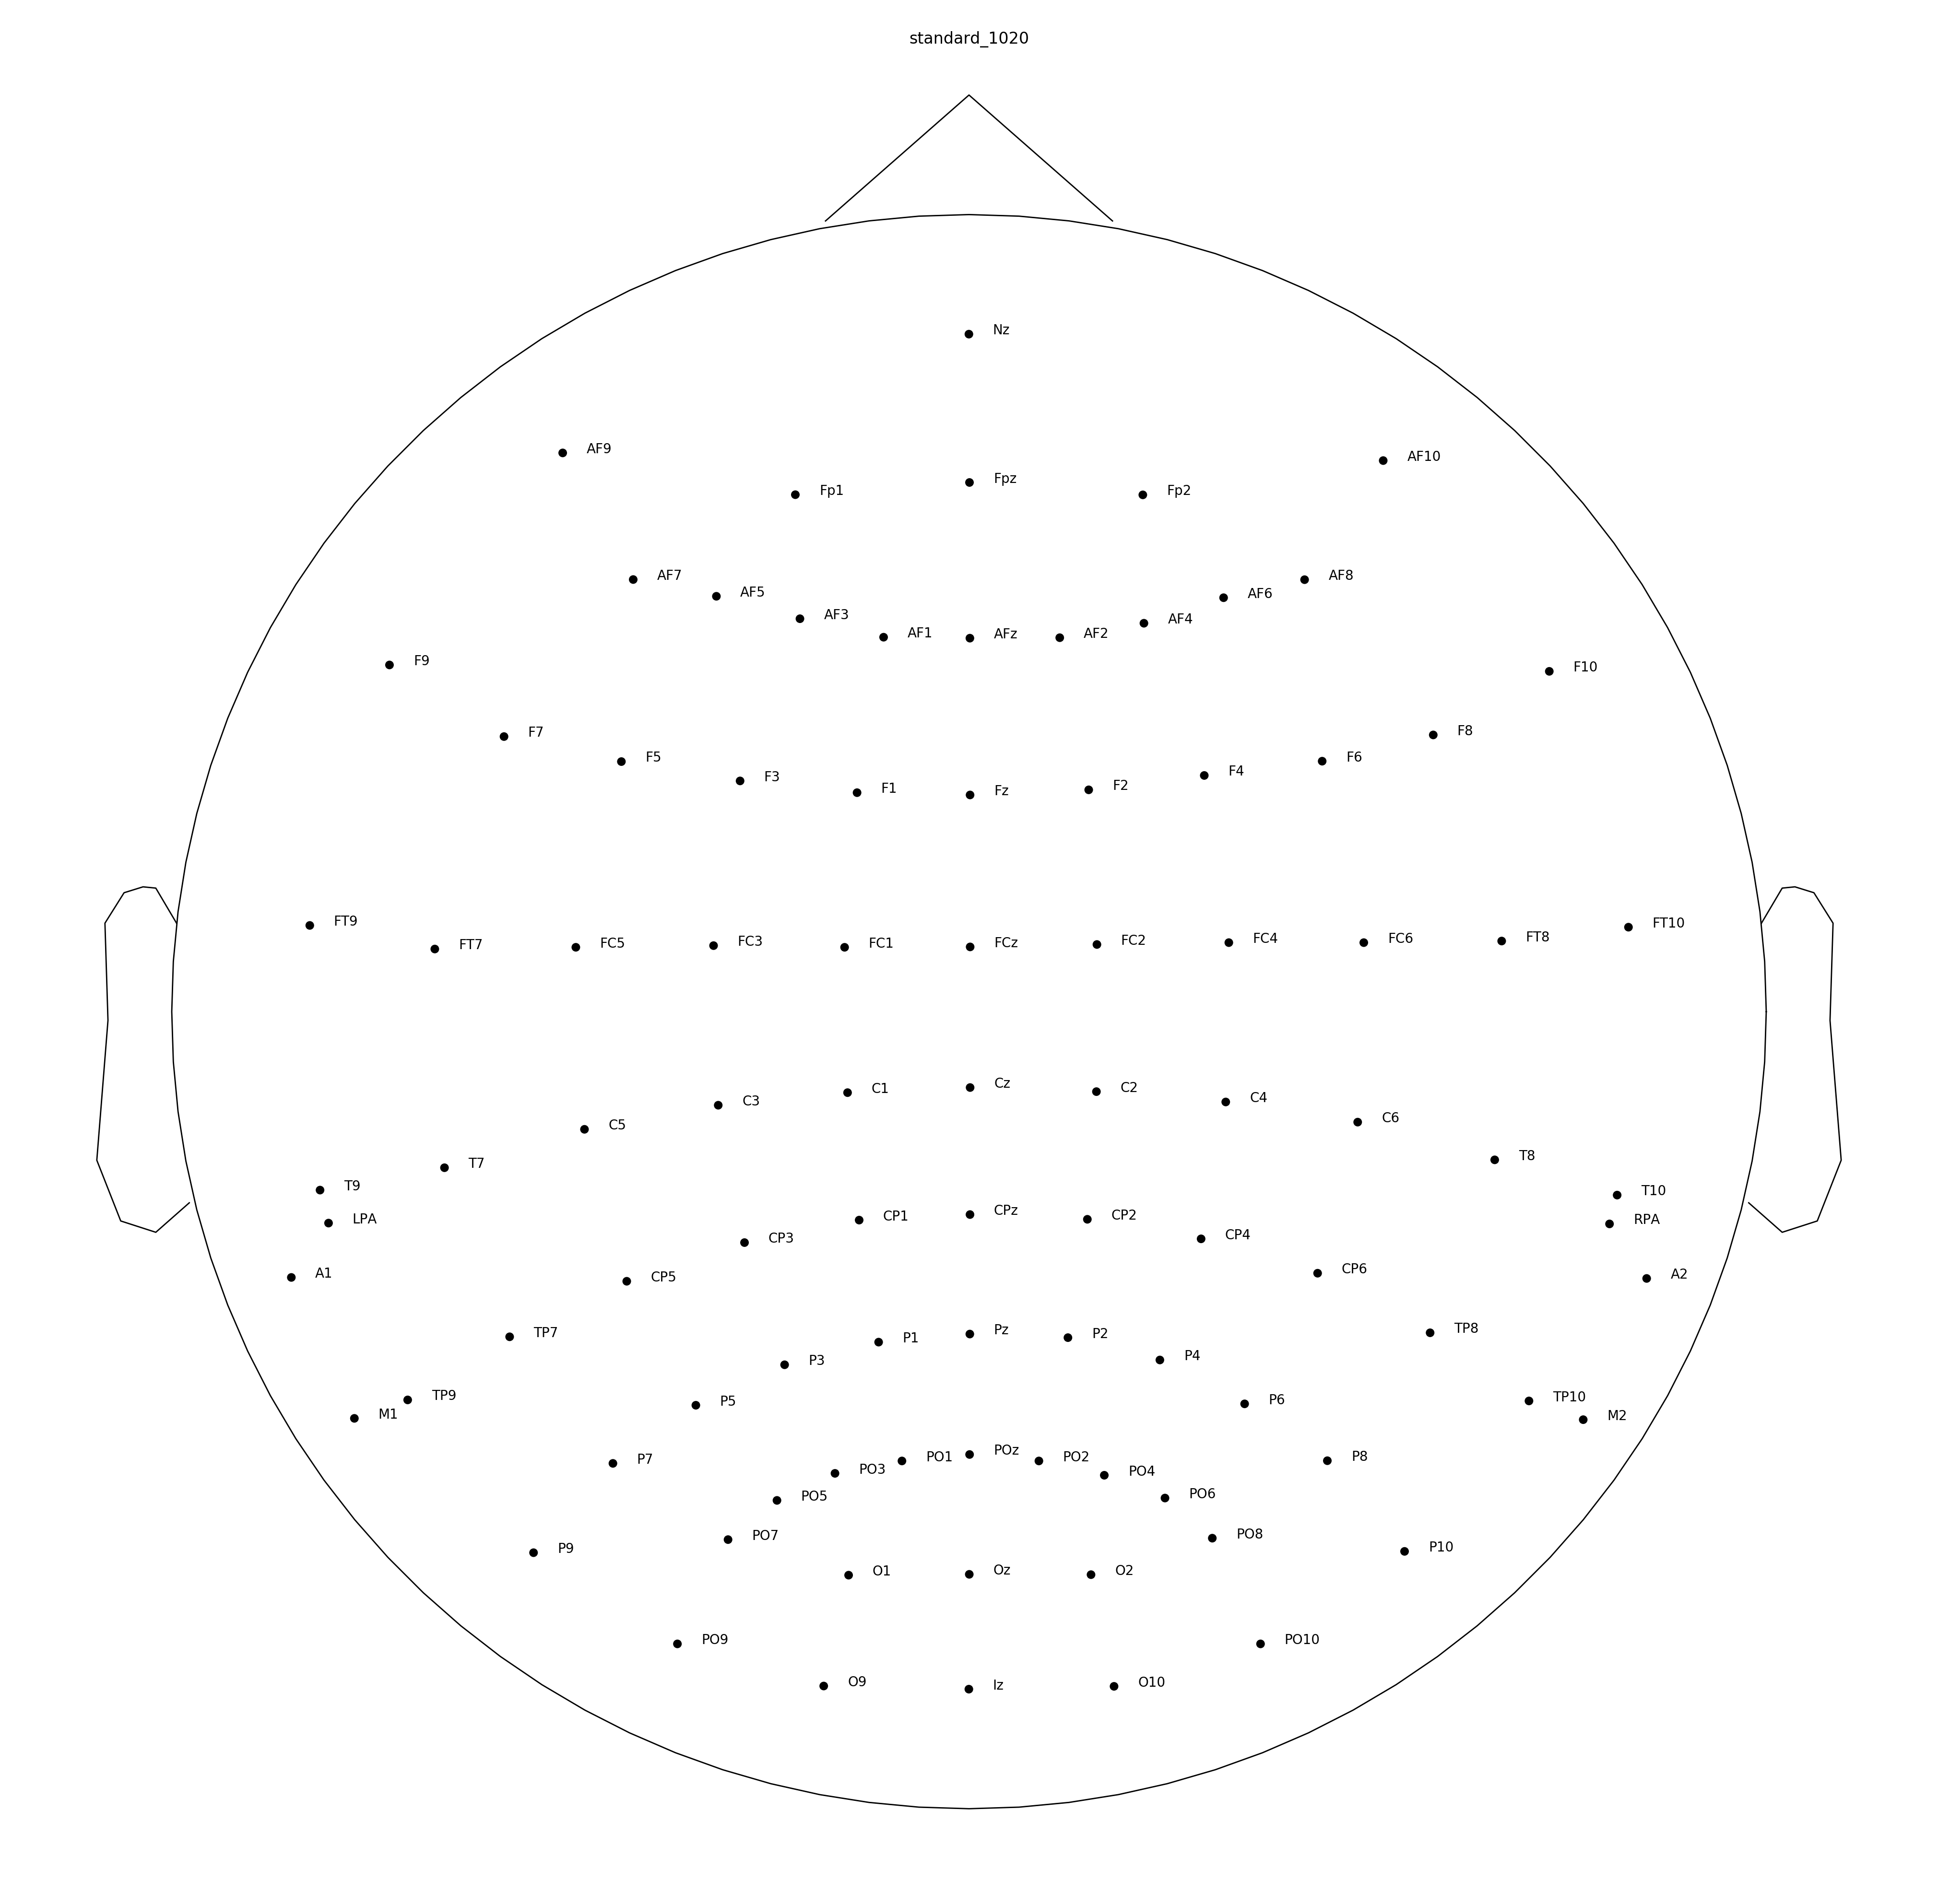

In [98]:
montage = mne.channels.read_montage("standard_1020")
montage.plot()
# plt.savefig('Montage1')

In [99]:
data.set_montage(montage)

<ipython-input-99-35f4347ba5d0>:1: DeprecationWarning: Setting a montage using anything rather than DigMontage is deprecated and will raise an error in v0.20. Please use ``read_dig_fif``, ``read_dig_egi``, ``read_dig_polhemus_isotrak``, or ``read_dig_captrack`` ``read_dig_hpts``, ``read_dig_captrack`` or ``read_custom_montage`` to read a digitization based on your needs instead; or ``make_standard_montage`` to create ``DigMontage`` based on template; or ``make_dig_montage`` to create a ``DigMontage`` out of np.arrays.
  data.set_montage(montage)
<ipython-input-99-35f4347ba5d0>:1: RuntimeWarning: Channel names are not unique, found duplicates for: {'TP8'}. Applying running numbers for duplicates.
  data.set_montage(montage)
<ipython-input-99-35f4347ba5d0>:1: RuntimeWarning: The following EEG sensors did not have a position specified in the selected montage: ['TP8-1']. Their position has been left untouched.
  data.set_montage(montage)


<RawEDF  |  chb01_03.edf, n_channels x n_times : 23 x 921600 (3600.0 sec), ~161.8 MB, data loaded>

In [12]:
mne.channel_indices_by_type(info)

{'eeg': [0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22],
 'stim': [],
 'eog': [],
 'ecg': [],
 'emg': [],
 'misc': [],
 'resp': [],
 'chpi': [],
 'exci': [],
 'ias': [],
 'syst': [],
 'seeg': [],
 'dipole': [],
 'gof': [],
 'bio': [],
 'ecog': [],
 'ref_meg': [],
 'mag': [],
 'grad': [],
 'hbo': [],
 'hbr': []}

In [ ]:
channels, data.chs

In [ ]:
info

In [19]:
len(data.annotations)

0

In [13]:
mne.__version__, data.info["sfreq"]

('0.19.0', 256.0)

In [92]:
data.set_eeg_reference("average", projection=True)

<ipython-input-92-c1da017e0ece>:1: RuntimeWarning: An average reference projection was already added. The data has been left untouched.
  data.set_eeg_reference("average", projection=True)


<RawEDF  |  chb01_03.edf, n_channels x n_times : 23 x 921600 (3600.0 sec), ~161.8 MB, data loaded>

In [44]:
# data.copy().apply_proj().plot()


In [45]:
# data.plot()

In [100]:
print(plt.rcParams.get('figure.figsize'))
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 20
fig_size[1] = 16
plt.rcParams["figure.figsize"] = fig_size

[20.0, 16.0]


In [22]:
data.plot(n_channels=23, scalings={"eeg": 75e-6})
plt.savefig('EEG1')

In [ ]:
lot(self, events=None, duration=10.0, start=0.0, n_channels=20, bgcolor='w', color=None, bad_color=(0.8, 0.8, 0.8), event_color='cyan', scalings=None, remove_dc=True, order=None, show_options=False, title=None, show=True, block=False, highpass=None, lowpass=None, filtorder=4, clipping=None, show_first_samp=False, proj=True, group_by='type', butterfly=False, decim='auto', noise_cov=None, event_id=None, show_scrollbars=True, verbose=None)

In [62]:
data.plot(duration=60, start=2990.0, n_channels=23, butterfly=True, scalings={"eeg": 20e-5})
plt.show()
plt.savefig('EEG Seizure Butterfly')

In [46]:

data.plot_psd(fmax=50)
data.plot(duration=5, n_channels=23, scalings={"eeg": 75e-8})
plt.show()

Effective window size : 8.000 (s)


Created an SSP operator (subspace dimension = 1)
1 projection items activated
SSP projectors applied...
Effective window size : 8.000 (s)


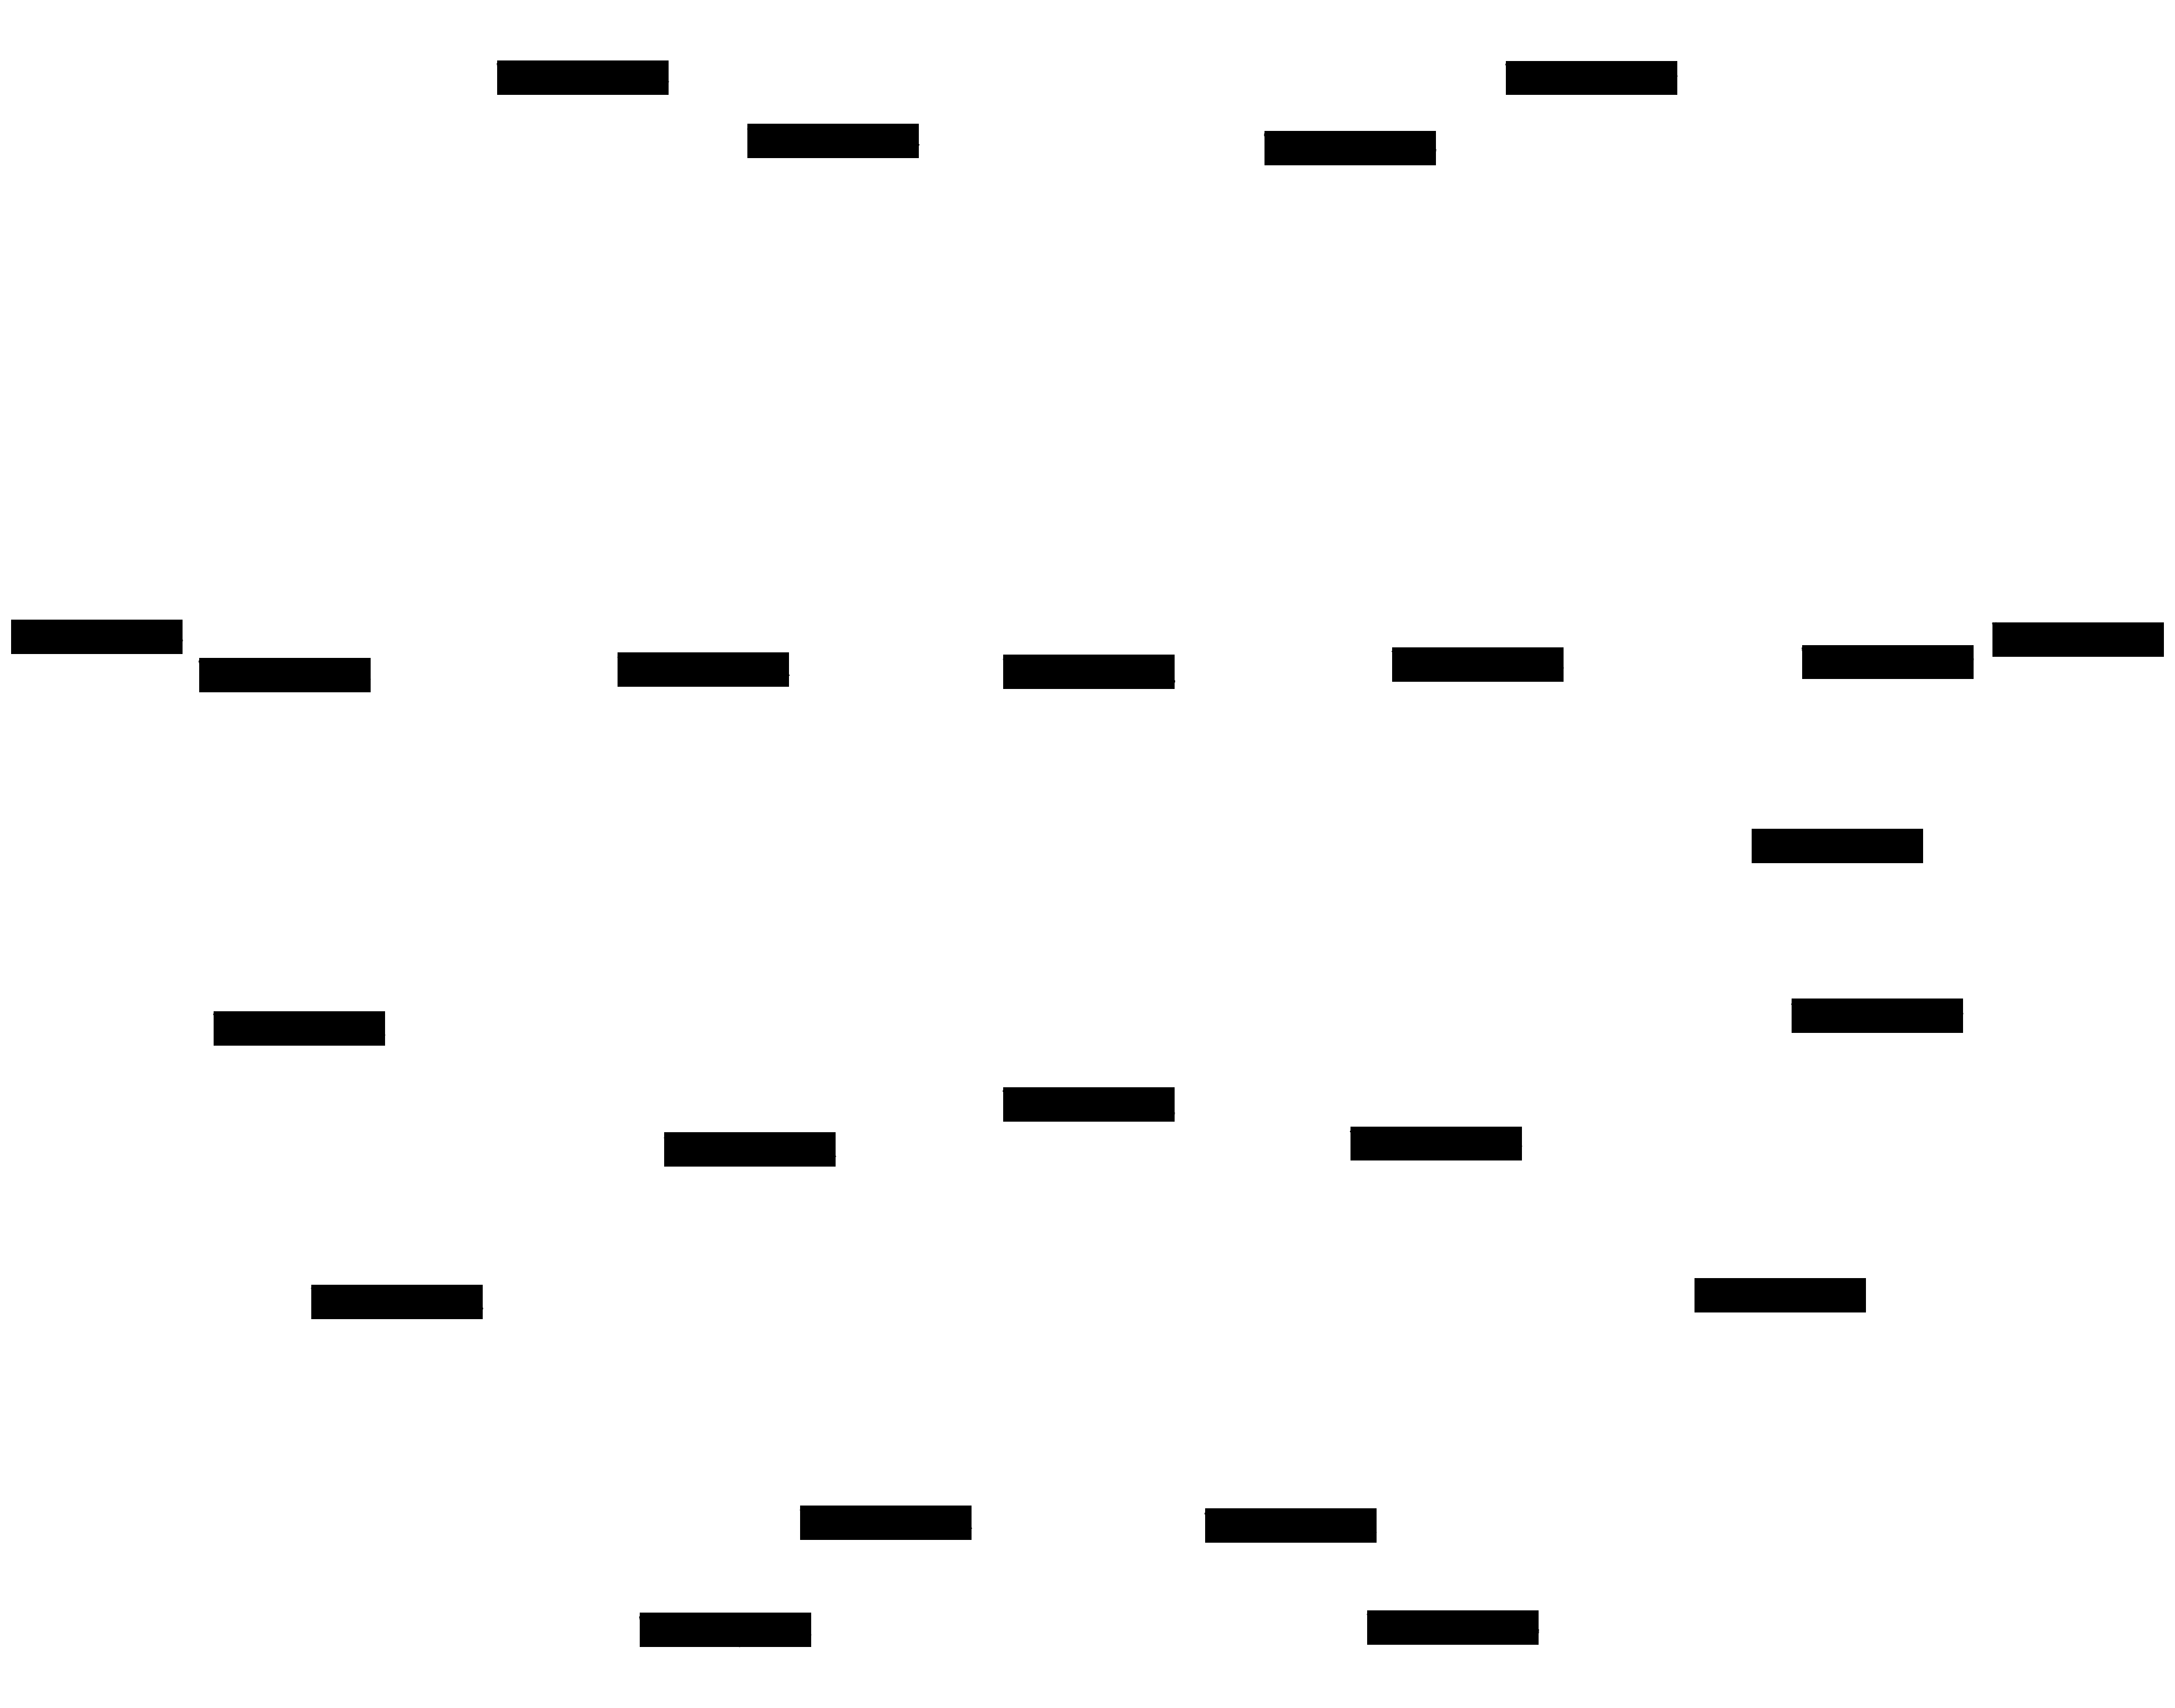

In [65]:
data.plot_psd_topo(tmin=2996, tmax=3036, fmin=1.0, fmax=100, proj=True, n_fft=2048, n_overlap=0, layout=None, color='k', fig_facecolor='w', axis_facecolor='k', dB=True, show=True, block=False, n_jobs=1, axes=None, verbose=None)




In [72]:
data.plot_psd(fmin=1.0, fmax=100.0, tmin=2996, tmax=3036, proj=True, n_fft=None, n_overlap=0, reject_by_annotation=True, picks=None, ax=None, color='black', xscale='linear', area_mode='std', area_alpha=0.33, dB=True, estimate='auto', show=True, n_jobs=1, average=False, line_alpha=None, spatial_colors=True, verbose=None)


plt.savefig('Seizure 1 Power Spectral Density across all Channels')

Created an SSP operator (subspace dimension = 1)
1 projection items activated
SSP projectors applied...
Effective window size : 8.000 (s)


In [77]:
fig = plt.figure()
ax2d = fig.add_subplot(121)
# ax3d = fig.add_subplot(122, projection='3d')
data.plot_sensors(kind='select', ch_type='eeg', show_names=True, axes=ax2d)

plt.savefig('Montage')
# ax3d.view_init(azim=70, elev=15)

In [ ]:
mne.viz.plot_sensors(info, kind='topomap', ch_type=None, title=None, show_names=False, ch_groups=None, to_sphere=True, axes=None, block=False, show=True

In [ ]:
my_annot = mne.Annotations(onset=[2996],
                           duration=[40],
                           description=['Seizure'], orig_time=data.info['meas_date'][0])



data.set_annotations(my_annot)
print(data.annotations)




In [19]:
data.info['meas_date']
meas_date2 = data.info['meas_date'][0] + data.info['meas_date'][1] / 1e6
meas_date2, data.info['meas_date']

(216135784.0, (216135784, 0))

In [101]:
data.plot_psd(fmin=1., fmax =100., tmin=2996, tmax=2998, average=False)
plt.savefig('PSD for first two seconds of first seizure')

Effective window size : 2.004 (s)


In [87]:
data = data.filter(1., 40., fir_design='firwin', n_jobs=1)
#band pass between 1 Hz and 40Hz (based on scipy.signal)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 845 samples (3.301 sec)



In [104]:
data.plot_psd(fmin=1., fmax =100., tmin=1, tmax=3, average=False)
plt.savefig('PSD for the First two seconds of recording')

Effective window size : 2.004 (s)


In [ ]:
mne.viz.plot_events(events, data.info['sfreq'], data.first_samp, event_id=)

In [ ]:
mne.make_fixed_length_events(data, id=1, start=0, stop=None, duration=1.0, first_samp=False, overlap=0.0)